# Part II -   Effects of rental characteristics on Rental Duration
## by Nam Vu Hoang

## Investigation Overview
In the data explanatory, I want to have a look at the features of bike rental data that could be used to predict or affect the rental duration. The main focus will be on the duration (in seconds) because it is highly correlated with rental fees. The main features correlated with durations are start and end hour, month, rideable_type, member_casual




## Dataset Overview

> The data comprises start and end time which can be used for calculating the duration (in seconds). The data has shape of approximately 2.49M bike rental data from January to September of 2024. The attributes include 

Each trip includes:

Bike ID

Bike Type

Start Time and Date

End Time and Date

Start Station ID

Start Station Name

Start Station Latitude

Start Station Longitude

End Station ID

End Station Name

End Station Latitude

End Station Longitude

User Type

Almost 200K rows has been removed from the analysis due to invalid values

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
bike_rental_1 = pd.read_csv('202401-baywheels-tripdata.csv')
bike_rental_2 = pd.read_csv('202402-baywheels-tripdata.csv')
bike_rental_3 = pd.read_csv('202403-baywheels-tripdata.csv')
bike_rental_4 = pd.read_csv('202404-baywheels-tripdata.csv')
bike_rental_5 = pd.read_csv('202405-baywheels-tripdata.csv')
bike_rental_6 = pd.read_csv('202406-baywheels-tripdata.csv')
bike_rental_7 = pd.read_csv('202407-baywheels-tripdata.csv')
bike_rental_8 = pd.read_csv('202408-baywheels-tripdata.csv')
bike_rental_9 = pd.read_csv('202409-baywheels-tripdata.csv')

In [4]:
bike_rental = pd.concat([bike_rental_1, bike_rental_2, bike_rental_3, bike_rental_4, bike_rental_5, bike_rental_6, bike_rental_7, bike_rental_8, bike_rental_9], ignore_index=True)
bike_rental.reset_index(drop=True, inplace=True)

In [5]:
bike_rental.dropna(inplace=True)
bike_rental.reset_index(drop=True, inplace=True)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

In [6]:
bike_rental.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,CC1B49543825D43C,classic_bike,2024-01-10 17:51:51,2024-01-10 17:57:03,Adeline St at 40th St,EM-D4,Genoa St at 55th St,OK-D2,37.831277,-122.278267,37.839649,-122.271756,member
1,DAD85B04AC2FE762,electric_bike,2024-01-18 17:16:16,2024-01-18 17:25:23,Valencia St at 16th St,SF-M22-2,29th St at Church St,SF-T20,37.765303,-122.421842,37.743684,-122.426806,member
2,DFC8F18E5862DA0C,electric_bike,2024-01-10 17:05:41,2024-01-10 17:20:03,Mechanics Monument Plaza (Market St at Bush St),SF-F28-1,Brannan St at 7th St,SF-K27-2,37.791315,-122.398834,37.772438,-122.403924,member
3,C431CBFB24AD4C1D,classic_bike,2024-01-27 13:50:50,2024-01-27 14:00:26,Beale St at Harrison St,SF-G30-1,Brannan St at 7th St,SF-K27-2,37.787963,-122.391808,37.772438,-122.403924,casual
4,11963D1C987A38FA,electric_bike,2024-01-28 15:27:55,2024-01-28 15:48:06,Mechanics Monument Plaza (Market St at Bush St),SF-F28-1,Greenwich St at Franklin St,SF-B21,37.791385,-122.398798,37.800287,-122.425786,casual


In [7]:
# Change the data type of the started_at and ended_at columns to datetime
# Adjusted custom function to handle datetime conversion with variability in milliseconds
def convert_datetime(date_str):
    for format in ("%Y-%m-%d %H:%M:%S.%f", "%Y-%m-%d %H:%M:%S"):
        try:
            return pd.to_datetime(date_str, format=format)
        except ValueError:
            pass
    raise ValueError(f"Unable to convert date with given formats: {date_str}")

# Apply the custom function to each element of the 'date_column'
bike_rental['started_at'] = bike_rental['started_at'].apply(convert_datetime)
bike_rental['ended_at'] = bike_rental['ended_at'].apply(convert_datetime)

# Change rideable_type and member_casual to category
bike_rental['rideable_type'] = bike_rental['rideable_type'].astype('category')
bike_rental['member_casual'] = bike_rental['member_casual'].astype('category')

In [17]:
# Now use started_at and ended_at columns to calculate the duration of the ride in seconds
bike_rental['duration'] = (bike_rental['ended_at'] - bike_rental['started_at']).dt.total_seconds()

# Drop all rows with duration less than or equal to 0 and greater than 10000 seconds
bike_rental_removed_outliers = bike_rental[(bike_rental['duration'] > 0) & (bike_rental['duration'] <= 3000)]

bike_rental.duration.describe()

count    2.242834e+06
mean     7.598656e+02
std      1.252651e+03
min     -1.000000e+00
25%      3.293870e+02
50%      5.508710e+02
75%      8.830000e+02
max      8.969600e+04
Name: duration, dtype: float64

## Distribution of Duration (in seconds)

Duration (in seconds) in the dataset is highly right skewed. It is from about 0.23s to 89696 seconds. Plotted on a log scale, the distribution of duration takes on a normal shape

Text(0, 0.5, 'Count')

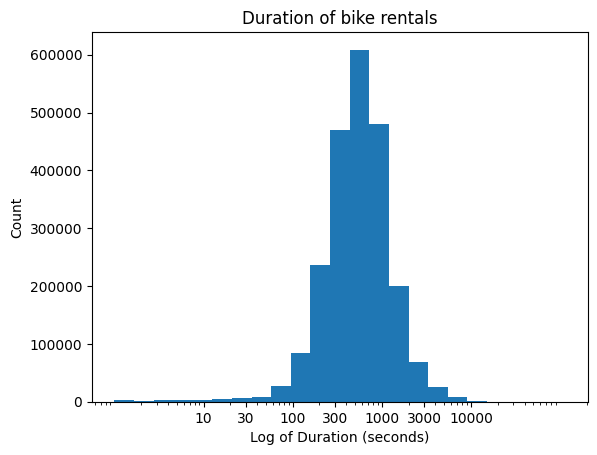

In [18]:
#Plot historgram of duration in log scale
log_duration_bins = 10 ** np.arange(0, 5.0+0.1, 0.22)
ticks = [10, 30, 100, 300, 1000, 3000, 10000]
labels = ['{}'.format(v) for v in ticks]

plt.hist(data = bike_rental, x = 'duration', bins = log_duration_bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.title('Duration of bike rentals')
plt.xlabel('Log of Duration (seconds)')
plt.ylabel('Count')

## Duratons vs the time members started riding bikes

Heatmap plotting duration and the time members started riding bikes (in hours) spotlights the period member riding the most. There are extreme many members who ride bikes at 8 and 17. 

Text(0.5, 1.0, 'Start Hour vs Duration')

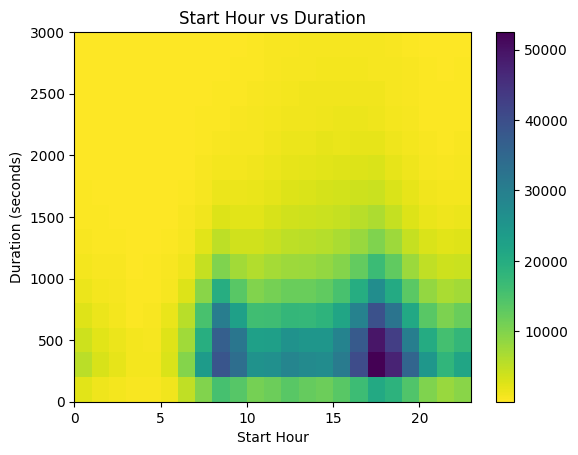

In [20]:
# Extract start hour from started_at column
bike_rental_removed_outliers['start_hour'] = bike_rental_removed_outliers['started_at'].dt.hour

hour_bins_x = np.arange(0, bike_rental_removed_outliers.start_hour.max()+1, 1)
hour_bins_y = np.arange(0, bike_rental_removed_outliers.duration.max()+200, 200)
plt.hist2d(data=bike_rental_removed_outliers, x='start_hour', y='duration', bins=[hour_bins_x, hour_bins_y], cmap='viridis_r', cmin=0.5)
plt.colorbar()
plt.xlabel('Start Hour')
plt.ylabel('Duration (seconds)')
plt.title('Start Hour vs Duration')

## Duration vs the month members started riding bikes

The duration is increasing from January to September. It means that the duration of members riding bikes in September is the longest

Text(0.5, 1.0, 'Month vs Duration')

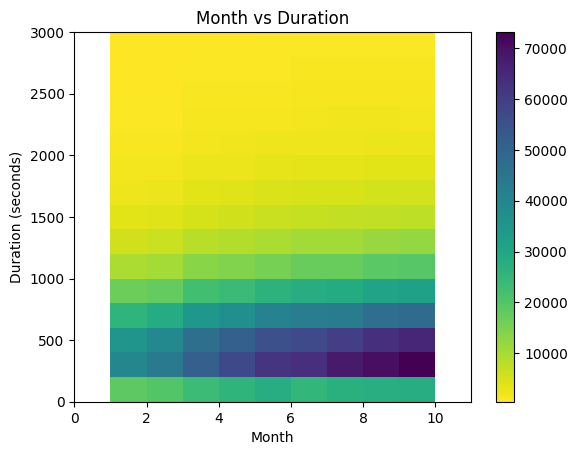

In [21]:
# Extract month from started_at column
bike_rental_removed_outliers['month'] = bike_rental_removed_outliers['started_at'].dt.month

month_bins_x = np.arange(0, bike_rental_removed_outliers.month.max()+ 3, 1)
month_bins_y = np.arange(0, bike_rental_removed_outliers.duration.max()+200, 200)
plt.hist2d(data=bike_rental_removed_outliers, x='month', y='duration', bins=[month_bins_x, month_bins_y], cmap='viridis_r', cmin=0.5)
plt.colorbar()
plt.xlabel('Month')
plt.ylabel('Duration (seconds)')
plt.title('Month vs Duration')

## Duration and Month by User type

In both member and casual users group, we can see that the number of rental bikes are increasing from January to September of 2024 and it reaches the top in September. However, members ride bikes shorter in general than casual users. 

Text(0, 0.5, 'Duration (seconds)')

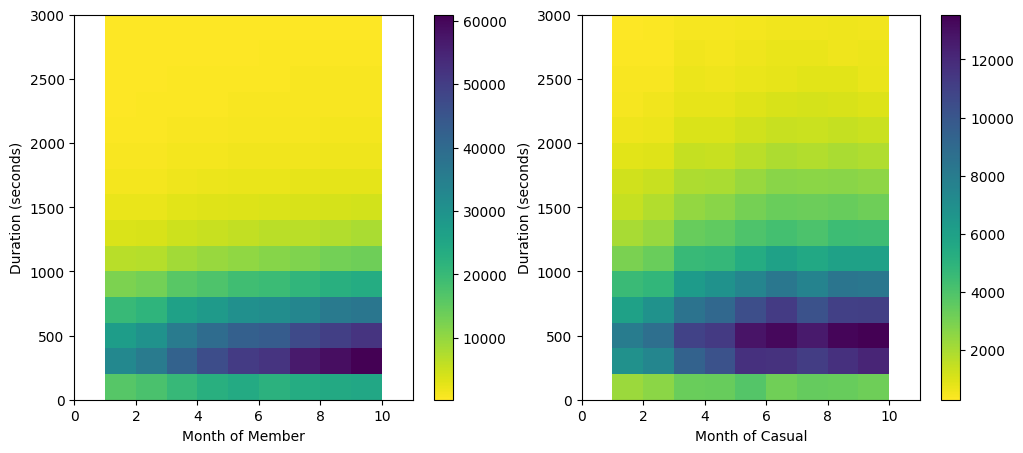

In [23]:
#Create heatmap for each casual or member user type
bike_rental_member = bike_rental_removed_outliers[bike_rental['member_casual'] == 'member']
bike_rental_casual = bike_rental_removed_outliers[bike_rental['member_casual'] == 'casual']

plt.figure(figsize=[12, 5])

plt.subplot(1, 2, 1)
plt.hist2d(data=bike_rental_member, x='month', y='duration', bins=[month_bins_x, month_bins_y], cmap='viridis_r', cmin=0.5)
plt.colorbar()
plt.xlabel('Month of Member') 
plt.ylabel('Duration (seconds)')

plt.subplot(1, 2, 2)
plt.hist2d(data=bike_rental_casual, x='month', y='duration', bins=[month_bins_x, month_bins_y], cmap='viridis_r', cmin=0.5)
plt.colorbar()
plt.xlabel('Month of Casual')
plt.ylabel('Duration (seconds)')

## Duration and rideable type by User Type
In both two types of bikes, members ride shorter than casual riders but it is much higher in classic bike

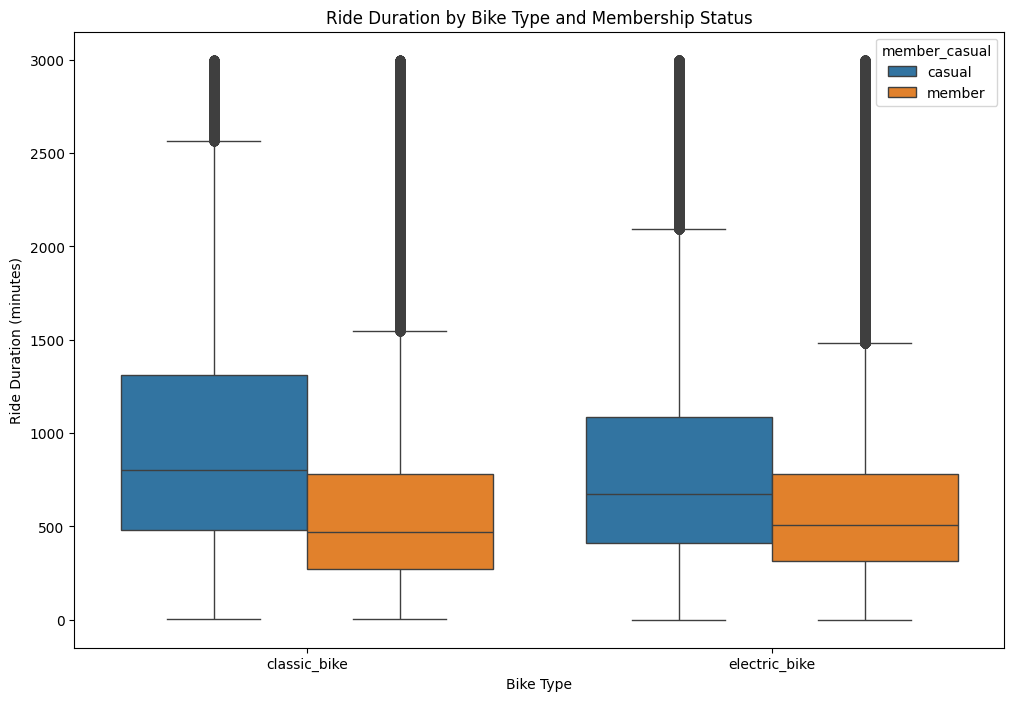

In [ ]:
# Set up the figure for ride duration, bike type, and member/casual
plt.figure(figsize=(12, 8))
sns.boxplot(x='rideable_type', y='duration', hue='member_casual', data=bike_rental_removed_outliers)
plt.title('Ride Duration by Bike Type and Membership Status')
plt.xlabel('Bike Type')
plt.ylabel('Ride Duration (minutes)')
plt.show()

In [24]:
# Export notebook as HTML or PDF 
from subprocess import call
call(['python', '-m', 'nbconvert', 'Part_II_slide_deck_template.ipynb', '--to', 'html'])

/Users/macbook/Documents/final-project-nano-degree/.venv/bin/python: No module named nbconvert


1